In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('t_lies.csv')

In [55]:
df = pd.read_csv('t_lies.csv', header=None, names=['date', 'lie'])
df.head(5)

,date,lie
0,"Jan. 21, 2017",I wasn't a fan of Iraq. I didn't want to go in...
1,"Jan. 21, 2017",A reporter for Time magazine — and I have been...
2,"Jan. 23, 2017",Between 3 million and 5 million illegal votes ...
3,"Jan. 25, 2017","Now, the audience was the biggest ever. But th..."
4,"Jan. 25, 2017",Take a look at the Pew reports (which show vot...


In [56]:
from datetime import datetime

In [57]:
df['date'] = pd.to_datetime(df['date'])
df.head(5)

,date,lie
0,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...
1,2017-01-21,A reporter for Time magazine — and I have been...
2,2017-01-23,Between 3 million and 5 million illegal votes ...
3,2017-01-25,"Now, the audience was the biggest ever. But th..."
4,2017-01-25,Take a look at the Pew reports (which show vot...


In [58]:
df['date'].groupby([df.date.dt.month]).agg('count')

date
1     12
2     29
3     15
4     23
5     14
6     18
7     15
8     10
9     13
10    28
11     3
Name: date, dtype: int64

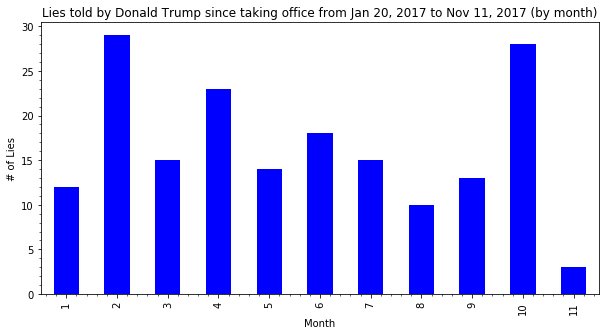

In [59]:
df_lies = df['date'].groupby([df.date.dt.month]).agg('count')
df_lies.plot(kind='bar', linewidth=2, figsize=(10,5), color='blue')

plt.ylabel('# of Lies')
plt.xlabel('Month')
plt.title('Lies told by Donald Trump since taking office from Jan 20, 2017 to Nov 11, 2017 (by month)')
plt.minorticks_on()

In [60]:
df['date'].value_counts()

2017-06-21    8
2017-02-16    6
2017-04-29    6
2017-10-17    6
2017-08-22    5
2017-09-27    4
2017-10-06    4
2017-07-25    4
2017-02-06    4
2017-01-25    4
2017-07-19    4
2017-04-12    4
2017-10-16    4
2017-08-03    3
2017-10-18    3
2017-05-08    3
2017-04-28    3
2017-02-28    3
2017-03-22    3
2017-05-01    3
2017-10-07    3
2017-02-24    3
2017-05-04    3
2017-10-10    2
2017-02-07    2
2017-03-13    2
2017-03-04    2
2017-05-12    2
2017-02-18    2
2017-04-21    2
             ..
2017-02-10    1
2017-08-15    1
2017-02-03    1
2017-04-06    1
2017-11-01    1
2017-09-08    1
2017-08-01    1
2017-04-16    1
2017-01-30    1
2017-01-23    1
2017-06-27    1
2017-09-28    1
2017-06-20    1
2017-05-13    1
2017-04-05    1
2017-10-25    1
2017-03-29    1
2017-06-23    1
2017-07-24    1
2017-02-12    1
2017-03-15    1
2017-07-17    1
2017-02-05    1
2017-01-29    1
2017-10-11    1
2017-05-02    1
2017-05-26    1
2017-04-18    1
2017-04-11    1
2017-03-20    1
Name: date, Length: 91, 

Text(0,0.5,'# of lies')

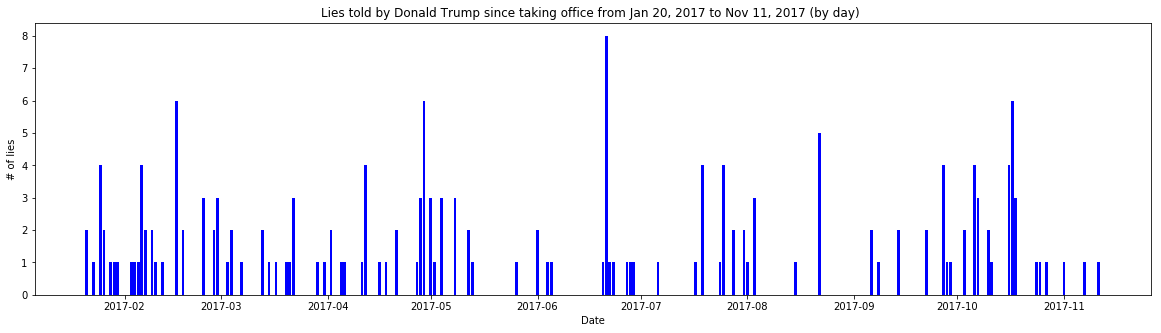

In [61]:
plt.figure(figsize=(20, 5))
s_date = df['date'].value_counts()
s_date = s_date.sort_index()
plt.bar(s_date.index, s_date.values, color='blue')

plt.title("Lies told by Donald Trump since taking office from Jan 20, 2017 to Nov 11, 2017 (by day) ")
plt.xlabel('Date')
plt.ylabel('# of lies')

I am going to find out the frequencies of a number of words I picked in Donald Trump's lies:

In [62]:
a = df.lie.str.contains('Obama').sum()
b = df.lie.str.contains('Iraq').sum()
c = df.lie.str.contains('China').sum()
d = df.lie.str.contains('media').sum()
e = df.lie.str.contains('Russia').sum()
print(a,b,c,d,e)

10 2 4 4 6


In [63]:
def check_name(x):
    return 'Obamacare' in str(x)
df['lie'].apply(check_name).value_counts()

False    177
True       3
Name: lie, dtype: int64

In [66]:
df[df['lie'].apply(check_name)]

,date,lie
35,2017-02-24,Obamacare covers very few people — and remembe...
36,2017-02-27,"Since Obamacare went into effect, nearly half ..."
79,2017-05-01,"Well, we are protecting pre-existing condition..."


In [67]:
all_text = []
for text in df['lie']:
    all_text.extend(text.split())

In [68]:
word_count = {}

In [69]:
for word in all_text:
    if word not in word_count:
        word_count[word] = 1
    else:
        word_count[word] = word_count[word] + 1

In [70]:
pd.Series(word_count).to_frame().reset_index().head(20)

,index,0
0,"""Welcome",1
1,$17,1
2,$200,1
3,$350,1
4,$600,1
5,$70,1
6,$700,3
7,$725,8
8,&,4
9,'a,1


In [71]:
pd.Series(word_count).sort_values(ascending=False).head(20)

the      198
of       109
I         86
in        78
and       75
to        74
a         53
have      45
that      44
was       40
—         33
you       32
they      31
is        29
are       24
with      23
for       22
We        20
about     20
it        20
dtype: int64

In [72]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Josephine
[nltk_data]     Wong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
from nltk.corpus import stopwords

In [74]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [75]:
stop_words = set(['I', '—', 'a', 'about', 'The', 'We', 'They', 'And', 'You', 'But', 'one', 'going', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd',
 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself',
 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same',
 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 'say', 'think', 'look', 'got', 'say', 'many', 'no', 'way', "we're", "We're", "it's", 'it.', "It's", 'really', 'said', 'get', 'cut', 'like', '–', "it's", 'it', "it’s", 'know', 'set', 'even', 'already', 'want', "they’re", 'As',"can't", 'It', 'them.', 'now,'])

In [76]:
df_word_count = pd.Series(word_count).to_frame().reset_index()

In [77]:
df_word_count.sort_values(by=0, ascending=False).head(50)

,index,0
1182,the,198
908,of,109
147,I,86
736,in,78
352,and,75
1221,to,74
314,a,53
688,have,45
1177,that,44
1276,was,40


In [78]:
def is_not_stop_word(x):
    return x not in stop_words
df_word_count[
    df_word_count['index'].apply(is_not_stop_word)
].sort_values(by=0, ascending=False)

,index,0
947,people,17
1068,saved,17
710,highest-taxed,15
1327,world.,14
877,nation,14
413,billions,12
727,hundreds,10
857,million,10
888,never,9
859,millions,9


In [79]:
df = df_word_count[
    df_word_count['index'].apply(is_not_stop_word)
].sort_values(by=0, ascending=False)
df

,index,0
947,people,17
1068,saved,17
710,highest-taxed,15
1327,world.,14
877,nation,14
413,billions,12
727,hundreds,10
857,million,10
888,never,9
859,millions,9


In [80]:
df.to_csv('frenquencies.csv')

In [81]:
!pip install wordcloud

In [82]:
from wordcloud import WordCloud
from PIL import Image
from subprocess import check_output
import matplotlib.pyplot as plt

Now, I am going to generate a wordcloud using word_count module,

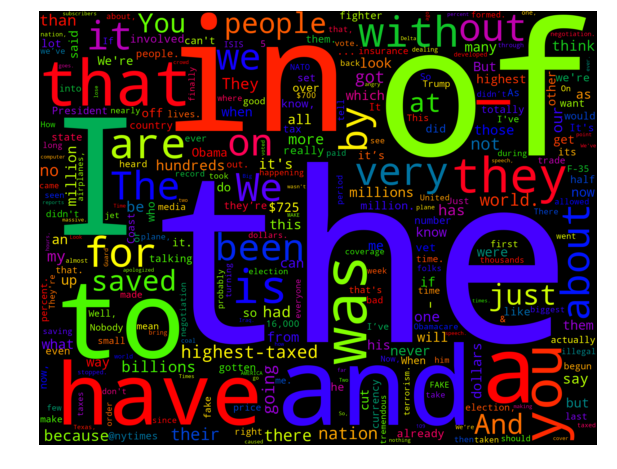

In [83]:
wc = WordCloud(
    background_color="black", 
    colormap='prism',
    width=1800,
    height=1400,
    max_words=300,
    stopwords=stop_words
    ).generate_from_frequencies(word_count)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

However, the stop words are still shown in the word cloud.
Therefore, I tried to generate another word cloud using the new dataset frequencies.csv I pulled from the original data that has taken out the stop words.

In [84]:
df.head(10)

,index,0
947,people,17
1068,saved,17
710,highest-taxed,15
1327,world.,14
877,nation,14
413,billions,12
727,hundreds,10
857,million,10
888,never,9
859,millions,9


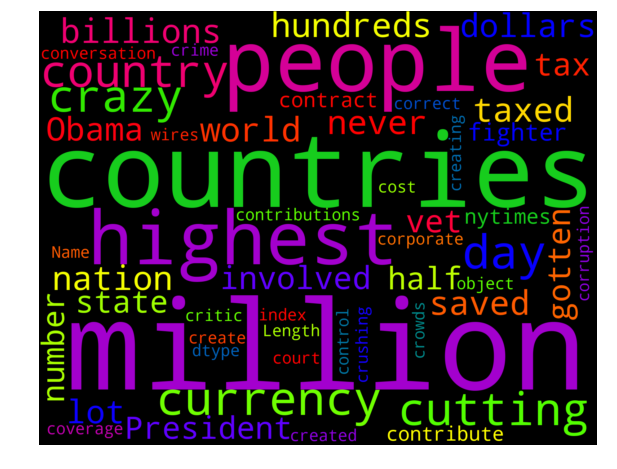

In [85]:
wordcloud = WordCloud(
    background_color="black",
    colormap="prism",
    stopwords=stop_words,
    width=1800,
    height=1400,
    max_words=500,
    max_font_size=400,
    ).generate(str(df['index']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now, there are no more stop words shown on the word cloud.